Starting NumPy implementation training...
Training completed in 0.1322 seconds after 1000 iterations
MAE: 52614.18624099271
RMSE: 72341.93615005612
R²: 0.6023464712460579

Final Model Performance Summary:
Training Time: 0.1322 seconds
Initial Cost: 56532442521.3654
Final Cost: 5112140583.9033
Cost Reduction: 51420301937.4621 (90.96%)


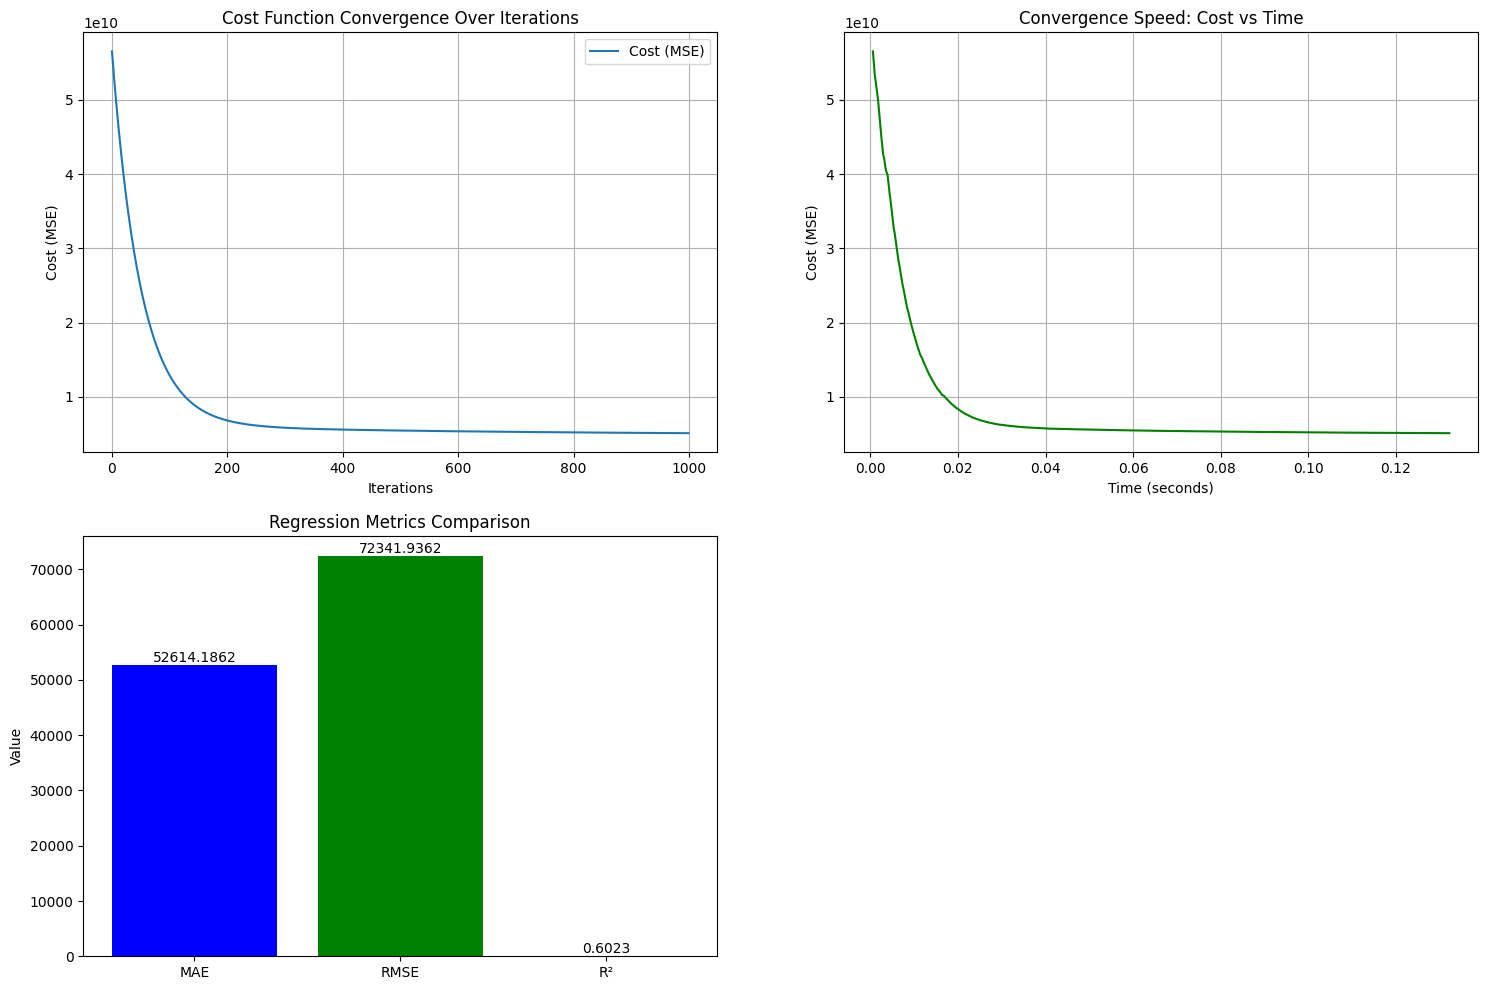

In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



data = pd.read_csv('../input/california-housing-prices/housing.csv')
X = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = data.median_house_value
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values
mean = np.mean(X_train_np, axis=0)
std = np.std(X_train_np, axis=0)
std[std == 0] = 1 
X_train_std = (X_train_np - mean) / std
X_test_std = (X_test_np - mean) / std

X_train_bias = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_bias = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

def numpy_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    costs = [] 
    times = []  
    start_time = time.time()
    
    for iteration in range(iterations):
        predictions = X @ weights
        gradients = (1/n_samples) * (X.T @ (predictions - y))
        weights = weights - learning_rate * gradients
        current_cost = np.mean((predictions - y) ** 2)
        costs.append(current_cost)
        times.append(time.time() - start_time)
        
        if iteration > 0 and abs(costs[-1] - costs[-2]) < 1e-6:
            break
            
    total_training_time = time.time() - start_time
    print(f"Training completed in {total_training_time:.4f} seconds after {len(costs)} iterations")
    
    return weights, np.array(costs), np.array(times), total_training_time
print("Starting NumPy implementation training...")
weights, costs, times, training_time = numpy_gradient_descent(X_train_bias, y_train_np, learning_rate=0.01)

predictions = X_test_bias @ weights
mae = np.mean(np.abs(y_test_np - predictions))
mse = np.mean((predictions - y_test_np) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test_np - predictions) ** 2) / np.sum((y_test_np - np.mean(y_test_np)) ** 2))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.plot(costs, label='Cost (MSE)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence Over Iterations')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(times, costs, color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Cost (MSE)')
plt.title('Convergence Speed: Cost vs Time')
plt.grid(True)

plt.subplot(2, 2, 3)
metrics = ['MAE', 'RMSE', 'R²']
values = [mae, rmse, r2]
colors = ['blue', 'green', 'orange']
plt.bar(metrics, values, color=colors)
plt.title('Regression Metrics Comparison')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

print(f"\nFinal Model Performance Summary:")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Initial Cost: {costs[0]:.4f}")
print(f"Final Cost: {costs[-1]:.4f}")
print(f"Cost Reduction: {costs[0] - costs[-1]:.4f} ({(1 - costs[-1]/costs[0])*100:.2f}%)")
